<a href="https://colab.research.google.com/github/dhserp-bit/Financial-Data-Analysis/blob/main/FX_Risk_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Font installed and registered!


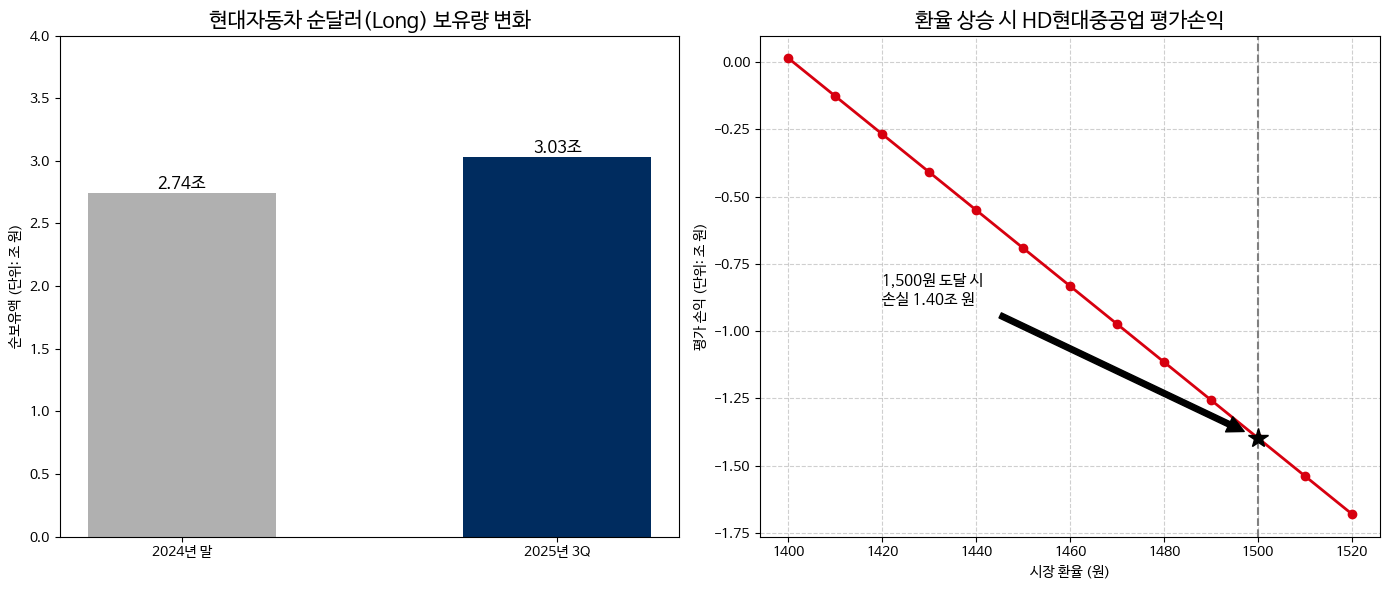

In [6]:
# ------------------------------------------------------------------
# [Data Source Note]
# 본 분석에 사용된 데이터는 DART 전자공시시스템의 사업보고서 및 분기보고서 주석(Notes)에서
# 비정형 데이터(민감도 분석, 파생상품 체결내역)를 직접 추출(Manual Extraction)하여 사용함.
# 이유: API 미지원 영역 및 데이터 정확성 확보 목적
# ------------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# [1] 폰트 강제 설치 및 등록 (Colab/Linux 전용)
def force_install_korean_font():
    # 1. 나눔폰트 설치
    if not os.path.exists('/usr/share/fonts/truetype/nanum'):
        print("Installing fonts... (Please wait)")
        os.system('apt-get update -qq')
        os.system('apt-get install fonts-nanum -qq')

    # 2. 폰트 경로 찾기
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

    # 3. Matplotlib에 폰트 강제 주입 (세션 재시작 불필요하게 만듦)
    fe = fm.FontEntry(
        fname=font_path,
        name='NanumBarunGothic'
    )
    fm.fontManager.ttflist.insert(0, fe)
    plt.rcParams.update({'font.family': 'NanumBarunGothic', 'axes.unicode_minus': False})
    print("✅ Font installed and registered!")

try:
    force_install_korean_font()
except:
    print("Windows 환경이거나 설치 실패. 기본 폰트로 진행합니다.")

# ------------------------------------------------------------------
# [데이터 및 시각화 로직]
# ------------------------------------------------------------------
# 데이터 (조 단위 변환 완료)
hmc_exposure_2024 = 2.74
hmc_exposure_2025 = 3.03
hhi_sell_volume_usd = 14117947 * 1000
estimated_hedge_rate = 1401

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 차트 1 (현대차)
years = ['2024년 말', '2025년 3Q']
values = [hmc_exposure_2024, hmc_exposure_2025]
bars = axes[0].bar(years, values, color=['#B0B0B0', '#002c5f'], width=0.5)
axes[0].set_title('현대자동차 순달러(Long) 보유량 변화', fontsize=15, fontweight='bold')
axes[0].set_ylabel('순보유액 (단위: 조 원)')
axes[0].set_ylim(0, 4.0)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}조',
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# 차트 2 (HD현대중공업)
sim_rates = range(1400, 1530, 10)
sim_losses = [(hhi_sell_volume_usd * (estimated_hedge_rate - r)) / 1000000000000 for r in sim_rates]

axes[1].plot(sim_rates, sim_losses, marker='o', color='#D7000F', linewidth=2)
axes[1].set_title('환율 상승 시 HD현대중공업 평가손익', fontsize=15, fontweight='bold')
axes[1].set_xlabel('시장 환율 (원)')
axes[1].set_ylabel('평가 손익 (단위: 조 원)')
axes[1].grid(True, linestyle='--', alpha=0.6)

crisis_val = sim_losses[sim_rates.index(1500)]
axes[1].axvline(x=1500, color='gray', linestyle='--')
axes[1].plot(1500, crisis_val, marker='*', color='black', markersize=15)
axes[1].annotate(f'1,500원 도달 시\n손실 {abs(crisis_val):.2f}조 원',
                 xy=(1500, crisis_val), xytext=(1420, crisis_val + 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()